# Лабораторная работа №1

## Предобработка данных

### Цель:


Ознакомиться с методами предобработки данных из библиотеки [Scikit Learn](https://scikit-learn.org)

### Выполнение:

## Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data . Данные представлены в виде csv таблицы.

2. Загрузить датасет в датафрейм, и исключить бинарные признаки и признак времени.

**Примечание**

Задания с пометкой *(Для углубленного изучения)* - для сдачи работы не обязательны

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [19]:
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])

In [20]:
print(df)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

3. Построить гистограммы признаков

In [21]:
import matplotlib.pyplot as plt

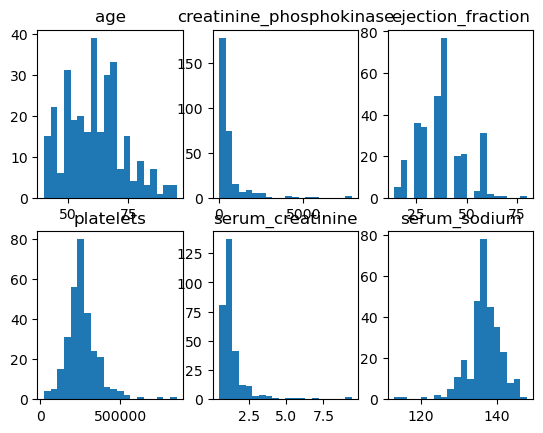

In [22]:
n_bins = 20

fig, axs = plt.subplots(2,3)

axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

4. На основании гистограмм определите диапазоны значений для каждого из признаков, а
также возле какого значения лежит наибольшее количество наблюдений.

5. Так как библиотека Sklearn работает с NumPy массива, то преобразуйте датафрейм к
двумерному массиву NumPy, где строка соответствует наблюдению, а столбец признаку

In [23]:
data = df.to_numpy(dtype='float')

## Стандартизация данных

1. Подключите модуль Sklearn. Настройте стандартизацию на основе первых 150 наблюдений используя [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [24]:
from sklearn import preprocessing

In [25]:
scaler = preprocessing.StandardScaler().fit(data[:150,:])

2. Стандартизуйте все данные

In [26]:
data_scaled = scaler.transform(data)

3. Постройте гистограммы стандартизированных данных

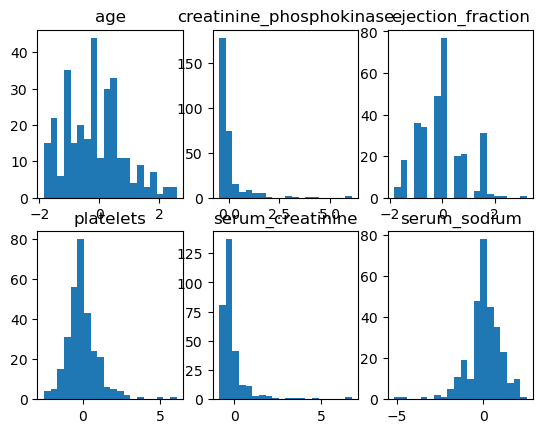

In [27]:
fig, axs = plt.subplots(2,3)

axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.show()

4. Сравните данные до и после стандартизации. Опишите, что изменилось и почему.

5. Рассчитайте мат. ожидание и СКО до и после стандартизации. На основании этих значений
выведите для каждого признака формулы по которым они стандартизировались.

6. Сравните значений из формул с полями mean_ и var_ объекта scaler

7. Проведите настройку стандартизации на всех данных и сравните с результатами настройки
на основании 150 наблюдений

**Примечание: вместо двух методов fit и transform можно использовать метод fit_transfrom, чтобы сразу настроить параметры и преобразовать данные.**

## Приведение к диапазону

1. Приведите данные к диапазону используя [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)

2. Постройте гистограммы для признаков и сравните с исходными данными

3. Через параметры [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) определите минимальное и максимальное значение в данных для каждого признака

4. Аналогично трансформируйте данные используя [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler) и [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler). Постройте гистограммы. Определите к какому диапазону приводятся данные.

5. Напишите функцию, которая приводит все данные к диапазону [-5 : 10]. *(Для углубленного изучения)*

## Нелинейные преобразования

1. Приведите данные к равномерному распределению используя [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

In [29]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,
random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)

2. Постройте гистограммы и сравните с исходными данными

3. Определите, как и на что влияет значение параметра n_quantiles

4. Приведите данные к нормальному распределению передав в QuantileTransformer параметр *output_distribution=‘normal’*

5. Постройте гистограммы и сравните с исходными данными

6. Самостоятельно приведите данные к нормальному распределению используя [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

## Дискретизация признаков

1. Проведите дискретизацию признаков, используя [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer), на следующее количество диапазонов:
- age - 3
- creatinine_phosphokinase - 4
- ejection_fraction - 3
- platelets - 10
- serum_creatinine - 2
- serum_sodium - 4

2. Постройте гистограммы. Объясните полученные результаты

3. Через параметр bin_edges_ выведите диапазоны каждого интервала для каждого признака